In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

# Load Cleaned Data

In [2]:
trips = pd.read_csv('./data/trips.csv') 
trips.head()

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,...,Month_2,Weekday,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,Trip_Distance_Miles,dx,dy,dy/dx
0,0,9900285854,Annual (San Antonio B-cycle),207.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,...,10,6,30.27041,-97.75046,30.25579,-97.73982,1.192306,0.01064,-0.01462,-1.374060
1,1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,...,10,6,30.26483,-97.73900,30.26717,-97.75484,0.958320,-0.01584,0.00234,-0.147727
2,2,9900285856,Annual Membership (Austin B-cycle),214.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,...,10,6,30.27041,-97.75046,30.26980,-97.74186,0.514558,0.00860,-0.00061,-0.070930
3,3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,10/26/2014,13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,...,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,...,10,6,30.28039,-97.73809,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
kiosk = pd.read_csv('./data/kiosk.csv') 
kiosk.head()

,Unnamed: 0,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,...,Num_Rides_2017_Wkends,Num_Rides_2018_Wkends,Num_Rides_2019_Wkends,Num_Rides_2020_Wkends,Num_Rides_2021_Wkends,Num_Rides_2017,Num_Rides_2018,Num_Rides_2019,Num_Rides_2020,Num_Rides_2021
0,0,2570,South Congress & Academy,active,"(30.25226, -97.74854)",1199 S. Congress Ave.,NaN,16752.0,sidewalk,10.0,...,44725.0,31400.0,7325.0,9850.0,10525.0,83900.0,54925.0,13650.0,15975.0,16650.0
1,1,2571,Red River & 8th Street,active,"(30.26854, -97.73646)",761 Red River St.,NaN,16760.0,sidewalk,13.0,...,35925.0,29125.0,8825.0,9525.0,11600.0,68250.0,54125.0,17775.0,16200.0,21475.0
2,2,2572,Barton Springs Pool,active,"(30.26452, -97.7712)",2200 William Barton Dr.,NaN,16758.0,parkland,13.0,...,56350.0,45350.0,22325.0,16950.0,15800.0,95600.0,76675.0,40025.0,31575.0,29725.0
3,3,2574,Zilker Park,active,"(30.2659, -97.76822)",Barton Springs Rd,Zilker Park at Barton Springs and William Burt...,16759.0,parkland,17.0,...,98250.0,78250.0,43000.0,46175.0,41850.0,154175.0,125125.0,69800.0,76575.0,69375.0
4,4,2575,Riverside @ S. Lamar,active,"(30.26446, -97.75665)",Presented by Austin Parks Foundation,NaN,16736.0,parkland,15.0,...,120975.0,104700.0,55400.0,57325.0,41625.0,210800.0,171925.0,97500.0,100650.0,73825.0


In [4]:
survey_2019 = pd.read_csv('./data/survey.csv') 
survey_2019.head()

,Unnamed: 0,ID,Year,Method,The City of Austin as a place to live,The City of Austin as a place to work,The City of Austin as a place to raise children,The City of Austin as a place to retire,The City of Austin as a place where I feel welcome,Overall quality of life in the city,...,"Q25 - If there was one thing you could share with the Mayor regarding the City of Austin (any comment, suggestion, etc.), what would it be?",Q25 - One thing to share with Mayor Topics,Quality of Life Topics,Economic Opportunity and Affordability Topics,Mobility Topics,Health and the Environment Topics,Safety Topics,Government That Works for All Topics,Culture and Lifelong Learning Topics,Share with the Mayor Topics
0,6374,2019_7610,2019,NaN,Satisfied,Satisfied,Satisfied,Dissatisfied,Dissatisfied,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6380,2019_5735,2019,NaN,Satisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6381,2019_6738,2019,Web,Dissatisfied,Neutral,Don't Know,Dissatisfied,Satisfied,Dissatisfied,...,NaN,NaN,Cost of Living,NaN,Roadways,NaN,Emergency Services,NaN,NaN,NaN
3,6382,2019_5604,2019,NaN,Very Dissatisfied,Neutral,Neutral,Very Dissatisfied,Dissatisfied,Dissatisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6384,2019_5665,2019,Mail,Satisfied,Neutral,Satisfied,Satisfied,Very Satisfied,Satisfied,...,"BUILD LIGHT RAIL, AFFORDABLE HOUSING, FIX 1ST ...",NaN,NaN,Housing,NaN,Homelessness,NaN,NaN,NaN,"Cost of Living,Housing,Public Transit"


# Loading smaller dataframes from "trips"

In [5]:
trips_2017 = pd.read_csv('./data/trips_2017.csv')
trips_2018 = pd.read_csv('./data/trips_2018.csv')
trips_2019 = pd.read_csv('./data/trips_2019.csv')
trips_2020 = pd.read_csv('./data/trips_2020.csv')
trips_2021 = pd.read_csv('./data/trips_2021.csv')
trips_recent = pd.read_csv('./data/trips_recent.csv')

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Visualizations

In [6]:
QuestX = 'Transportation options (aside from personal vehicle) to get around Austin (e.g. ride share, but/train, bike, walk)'
transp_opts = survey_2019[QuestX]

In [7]:
transp_opts.value_counts()

Neutral              527
Very Dissatisfied    439
Dissatisfied         415
Satisfied            348
Don't Know           233
Very Satisfied        87
Name: Transportation options (aside from personal vehicle) to get around Austin (e.g. ride share, but/train, bike, walk), dtype: int64

<ipython-input-8-b22725e58226>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


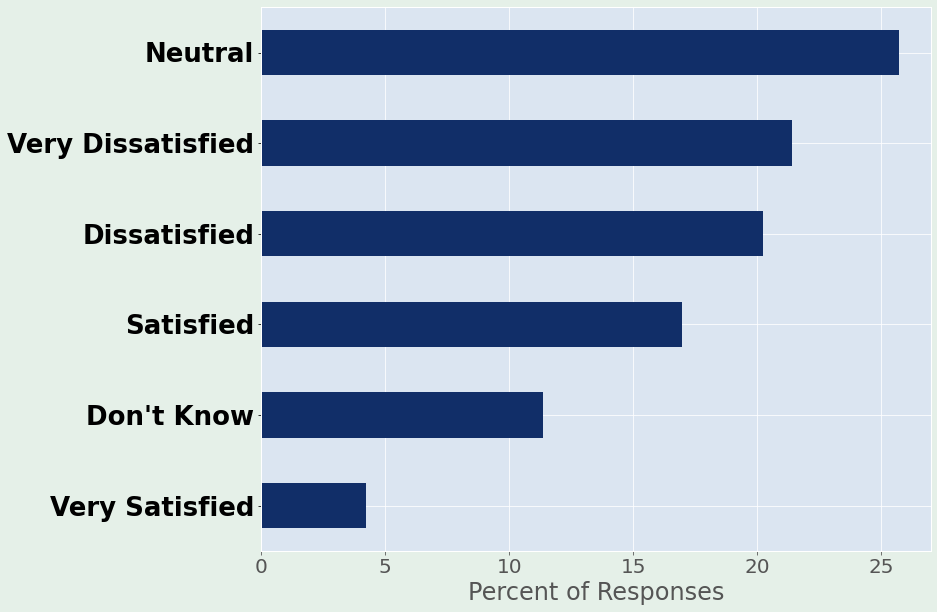

In [8]:
fig = plt.figure(figsize = (12,10))
((survey_2019.groupby(QuestX).size()/sum(transp_opts.value_counts()))*100).sort_values(ascending=True).plot.barh(
    color = '#112e68')

#from matplotlib.patches import Rectangle
#currentAxis = plt.gca()
#currentAxis.add_patch(Rectangle((0.12, 2.5), 21.75, 2, facecolor="none", ec='r', lw=7))

ax = plt.axes() 
ax.tick_params(axis='y', colors='black')
ax.set_facecolor('#dbe5f1')

plt.xlabel('Percent of Responses')
plt.ylabel('')
plt.yticks(fontsize=26, weight = 'bold')

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-9-94ae51804711>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


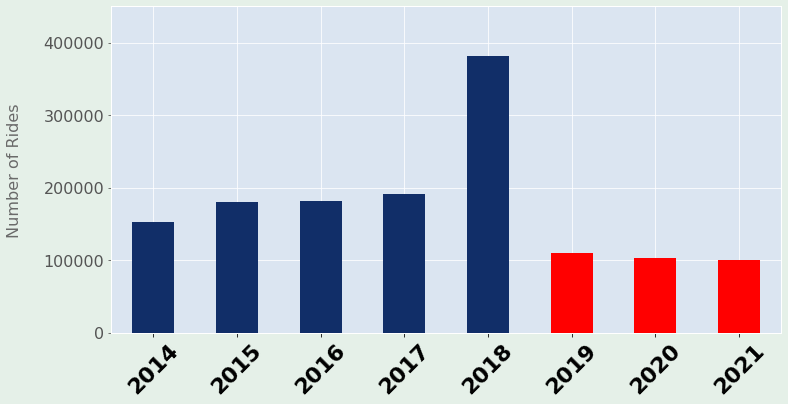

In [9]:
clrs = ['#112e68' if (x > 120000) else 'red' for x in trips.groupby('Year_2').size()]

fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2').size().plot.bar(color = clrs)

ytemp = 12000
#plt.text(8,(100702+ytemp),
#         "100702",horizontalalignment='center',fontsize=16) #2021
#plt.text(7,(102334+ytemp),
#         "102334",horizontalalignment='center',fontsize=16) #2020
#plt.text(6,(111409+ytemp),
#         "111409",horizontalalignment='center',fontsize=16) #2019
#plt.text(5,(390488+ytemp),
#         "390488",horizontalalignment='center',fontsize=16) #2018
#plt.text(4,(193492+ytemp),
#         "193492",horizontalalignment='center',fontsize=16) #2017

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1')
#ax.spines['bottom'].set_color('black')
#ax.spines['left'].set_color('black')

plt.ylabel('Number of Rides\n',fontsize=16,color='#6A6A6A',rotation=90)
plt.xlabel('')
plt.ylim(0,450000)
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks(fontsize=16)
plt.yticks([0,100000,200000,300000,400000])
plt.xlim(0.5,8.5)
#import matplotlib.ticker as ticker
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

In [10]:
trips.groupby('Year_2')['Bicycle ID'].nunique()

Year_2
2013      83
2014     375
2015     392
2016     396
2017     428
2018    1037
2019     548
2020     701
2021     788
Name: Bicycle ID, dtype: int64

<ipython-input-11-de4440ac80d5>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


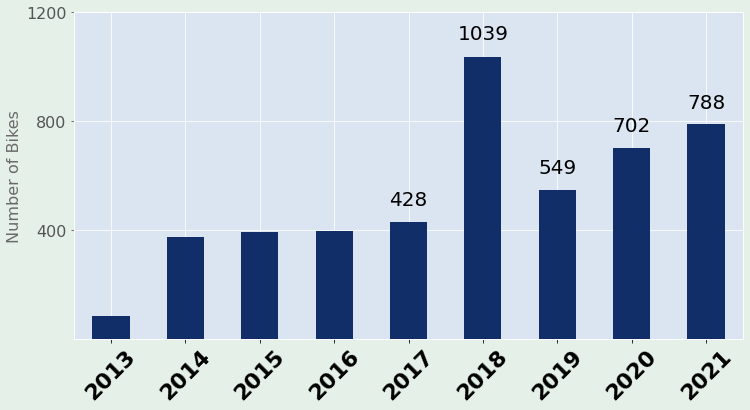

In [11]:
fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2')['Bicycle ID'].nunique().plot.bar(
    color = '#112e68')

plt.text(4,489,"428",horizontalalignment='center') #2017
plt.text(5,1100,"1039",horizontalalignment='center') #2018
plt.text(6,610,"549",horizontalalignment='center') #2019
plt.text(7,763,"702",horizontalalignment='center') #2020
plt.text(8,849,"788",horizontalalignment='center') #2021

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1') 
#ax.xaxis.tick_top()

plt.ylabel('Number of Bikes',fontsize=16,color='#6A6A6A')
plt.xlabel('')
plt.ylim(0,1200)
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks([400,800,1200])
plt.yticks(fontsize=16)

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

In [12]:
trips.groupby('Year_2')['Checkout Kiosk ID'].nunique()

Year_2
2013    11
2014    46
2015    53
2016    57
2017    59
2018    76
2019    76
2020    76
2021    76
Name: Checkout Kiosk ID, dtype: int64

<ipython-input-13-f7389e9d2038>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


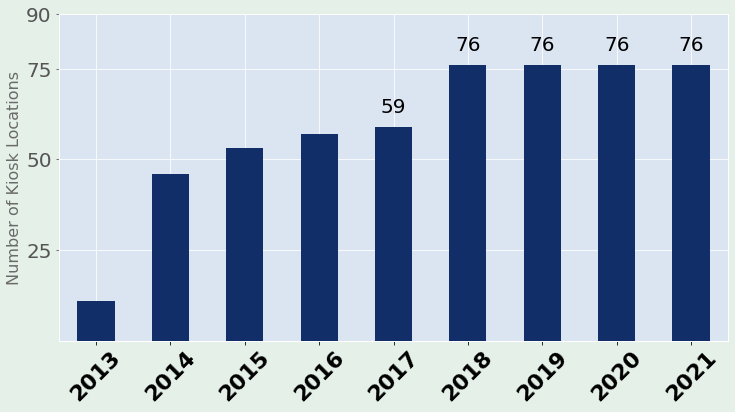

In [13]:
fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2')['Checkout Kiosk ID'].nunique().plot.bar(
    color = '#112e68')

plt.text(4,63,"59",horizontalalignment='center') #2017
plt.text(5,80,"76",horizontalalignment='center') #2018
plt.text(6,80,"76",horizontalalignment='center') #2019
plt.text(7,80,"76",horizontalalignment='center') #2020
plt.text(8,80,"76",horizontalalignment='center') #2021

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1') 

plt.ylabel('Number of Kiosk Locations',fontsize=16,color='#6A6A6A')
plt.xlabel('')
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks([25,50,75,90])

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

In [14]:
trips.groupby('Year_2')['Membership Type'].nunique()

Year_2
2013     8
2014    31
2015    25
2016    24
2017    18
2018    28
2019    27
2020    19
2021    13
Name: Membership Type, dtype: int64

<ipython-input-15-01cb4dfb4062>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


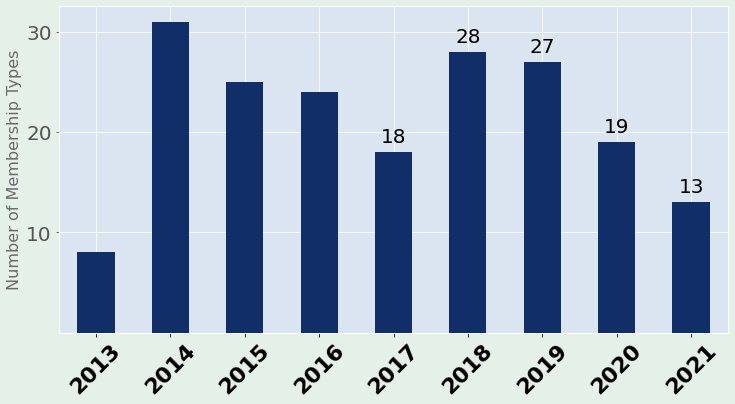

In [15]:
fig = plt.figure(figsize = (12,6))
trips.groupby('Year_2')['Membership Type'].nunique().plot.bar(
    color = '#112e68')

plt.text(4,19,"18",horizontalalignment='center') #2017
plt.text(5,29,"28",horizontalalignment='center') #2018
plt.text(6,28,"27",horizontalalignment='center') #2019
plt.text(7,20,"19",horizontalalignment='center') #2020
plt.text(8,14,"13",horizontalalignment='center') #2021

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
ax.set_facecolor('#dbe5f1') 

plt.ylabel('Number of Membership Types',fontsize=16,color='#6A6A6A')
plt.xlabel('')
plt.xticks(fontsize=22, weight = 'bold')
plt.yticks([10, 20, 30])

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-16-e06d925e2beb>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


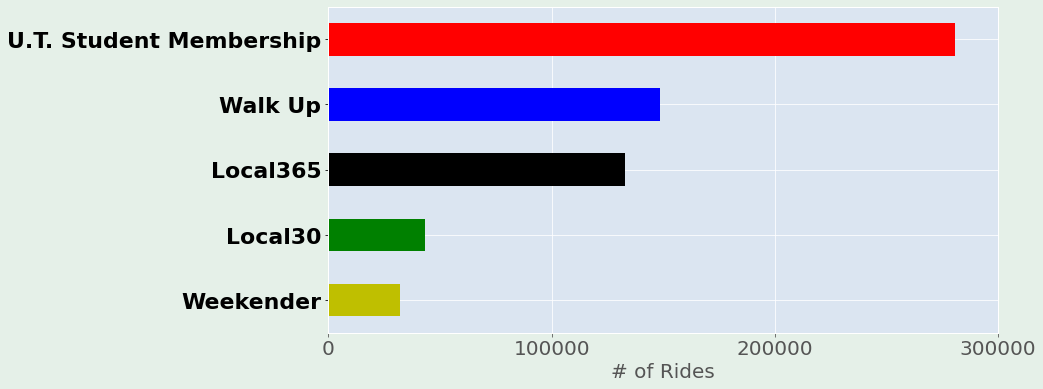

In [16]:
my_colors = list('ygkbr')
fig = plt.figure(figsize = (12,6))
trips_recent.groupby(
    ['Membership Type']).size().nlargest(5).sort_values(
    ascending=True).plot.barh(color = my_colors)

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 
ax.tick_params(axis='y', colors='black')

plt.xlabel('# of Rides',fontsize=20)
plt.yticks(fontsize=22, weight = 'bold')
plt.ylabel('')
plt.xticks([0,100000,200000,300000])

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-17-0072ee843902>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


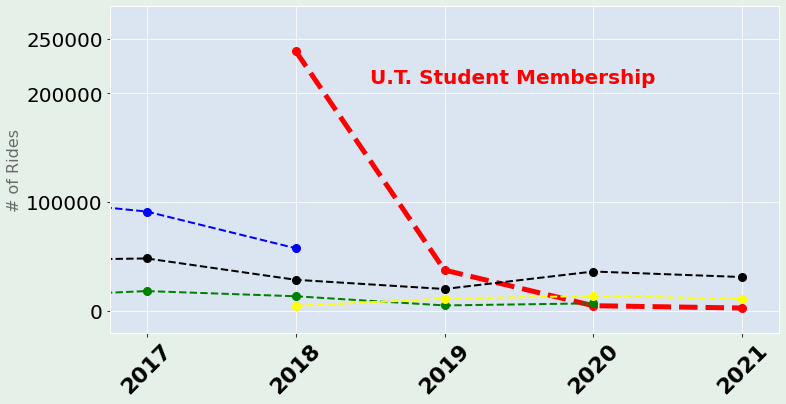

In [17]:
fig = plt.figure(figsize = (12,6))
plt.plot([2018, 2019, 2020, 2021],
         trips.loc[trips['Membership Type'] == 'U.T. Student Membership'].groupby('Year_2').size(),
        color='red', marker='o', linestyle='dashed',linewidth=5, markersize=8)
plt.plot([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
         trips.loc[trips['Membership Type'] == 'Local365'].groupby('Year_2').size(), 
        color='black', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot([2014, 2015, 2016, 2017, 2018],
         trips.loc[trips['Membership Type'] == 'Walk Up'].groupby('Year_2').size(), 
        color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot([2014, 2015, 2016, 2017, 2018, 2019, 2020],
         trips.loc[trips['Membership Type'] == 'Local30'].groupby('Year_2').size(), 
        color='green', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot([2018, 2019, 2020, 2021],
         trips.loc[trips['Membership Type'] == '24 Hour Walk Up Pass'].groupby('Year_2').size(), 
        color='yellow', marker='o', linestyle='dashed',linewidth=2, markersize=8)

plt.text(2018.5,209000,"U.T. Student Membership",color='r',weight = 'bold')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='x', colors='black',rotation=45)

# plt.xlabel('Year')
plt.ylabel('# of Rides',fontsize=16,color='#6A6A6A')
plt.xlim(2016.75,2021.25)
plt.yticks([0,100000,200000,250000])
plt.ylim(-20000,280000)
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xticks(fontsize=22, weight = 'bold')

fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)


<ipython-input-18-8d0de555b8b2>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


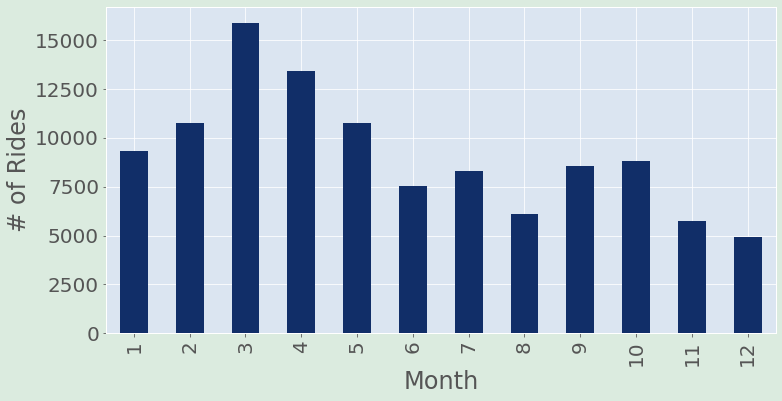

In [18]:
fig = plt.figure(figsize = (12,6))
trips_2019.groupby('Month_2').size().plot.bar(color = '#112e68')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 

plt.ylabel('# of Rides')
plt.xlabel('Month')

fig.patch.set_facecolor('#dbebdf')

<ipython-input-19-c4eff7275c65>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


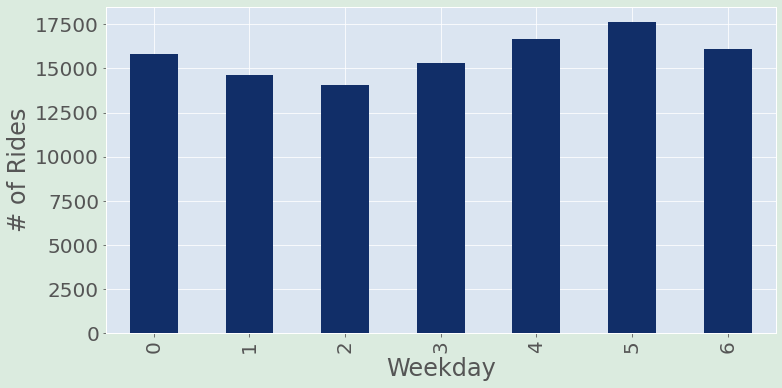

In [19]:
fig = plt.figure(figsize = (12,6))
trips_2019.groupby('Weekday').size().plot.bar(color = '#112e68')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 

plt.ylabel('# of Rides')
plt.xlabel('Weekday')

fig.patch.set_facecolor('#dbebdf')

<ipython-input-20-a8ca338fb15e>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


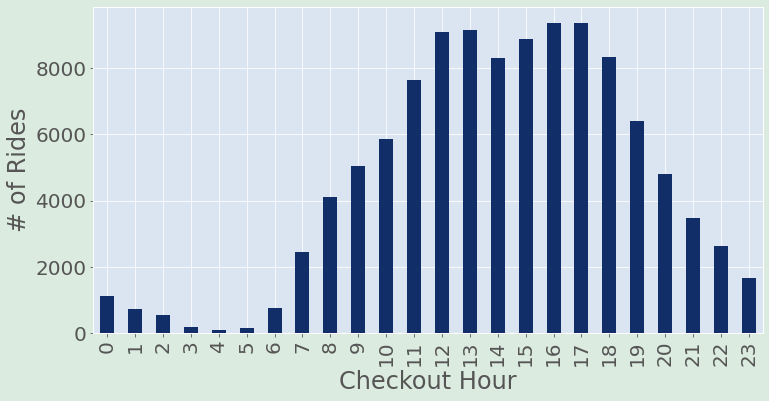

In [20]:
fig = plt.figure(figsize = (12,6))
trips_2019.groupby('Checkout_Hour').size().plot.bar(color = '#112e68')

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 

plt.ylabel('# of Rides')
plt.xlabel('Checkout Hour')

fig.patch.set_facecolor('#dbebdf')

Text(0.5, 0, 'Kiosk ID')

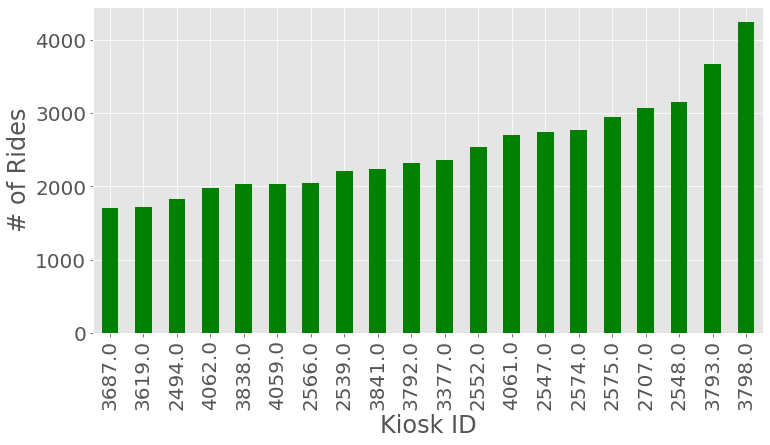

In [21]:
plt.figure(figsize = (12,6))
trips_2021.groupby('Checkout Kiosk ID').size(
        ).nlargest(20).sort_values().plot.bar(color = 'g')

plt.ylabel('# of Rides')
plt.xlabel('Kiosk ID')

In [22]:
trips.loc[trips['Checkout Kiosk ID'] == 2707]

,Unnamed: 0,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,...,Month_2,Weekday,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,Trip_Distance_Miles,dx,dy,dy/dx
40,41,9900285895,Annual Membership (Austin B-cycle),55.0,10/26/2014,14:12:00,2707.0,Rainey St @ Cummings,2550.0,Republic Square @ Guadalupe & 4th St.,...,10,6,30.25579,-97.73982,30.26774,-97.74692,0.927393,-0.00710,0.01195,-1.683099
64,66,9900285920,Annual Membership (Austin B-cycle),407.0,10/26/2014,14:12:00,2707.0,Rainey St @ Cummings,NaN,Zilker Park at Barton Springs & William Barton...,...,10,6,30.25579,-97.73982,NaN,NaN,NaN,NaN,NaN,NaN
145,149,9900286002,24-Hour Kiosk (Austin B-cycle),306.0,10/26/2014,15:12:00,2707.0,Rainey St @ Cummings,2707.0,Rainey St @ Cummings,...,10,6,30.25579,-97.73982,30.25579,-97.73982,0.000000,0.00000,0.00000,NaN
147,151,9900286004,24-Hour Kiosk (Austin B-cycle),207.0,10/26/2014,15:12:00,2707.0,Rainey St @ Cummings,2707.0,Rainey St @ Cummings,...,10,6,30.25579,-97.73982,30.25579,-97.73982,0.000000,0.00000,0.00000,NaN
170,175,9900286028,24-Hour Kiosk (Austin B-cycle),88.0,10/26/2014,16:12:00,2707.0,Rainey St @ Cummings,2707.0,Rainey St @ Cummings,...,10,6,30.25579,-97.73982,30.25579,-97.73982,0.000000,0.00000,0.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401910,1424483,24670835,Local365,16831,07/25/2021,14:46:33,2707.0,Rainey/Cummings,2539,3rd/Trinity @ The Convention Center,...,7,6,30.25579,-97.73982,30.26426,-97.74023,0.585324,-0.00041,0.00847,-20.658537
1402001,1424574,24688445,Explorer,993,07/27/2021,19:56:02,2707.0,Rainey/Cummings,2707,Rainey/Cummings,...,7,1,30.25579,-97.73982,30.25579,-97.73982,0.000000,0.00000,0.00000,NaN
1402012,1424585,24690065,Local365,21468,07/28/2021,7:16:24,2707.0,Rainey/Cummings,3621,3rd/Nueces,...,7,2,30.25579,-97.73982,30.26697,-97.74929,0.956464,-0.00947,0.01118,-1.180570
1402017,1424590,24690695,Local365,19679,07/28/2021,9:28:34,2707.0,Rainey/Cummings,2563,Rainey/Davis,...,7,2,30.25579,-97.73982,30.26019,-97.73845,0.314594,0.00137,0.00440,3.211679


0.533507330355679


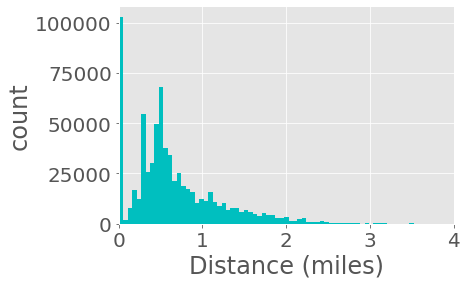

In [23]:
plt.hist(trips_recent['Trip_Distance_Miles'], bins = 100, color = "c")
plt.xlabel('Distance (miles)')
plt.ylabel('count')
plt.xlim(0,4)

med_dist = trips_recent['Trip_Distance_Miles'].median()
print(med_dist)

# GeoMaps STuff

In [24]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [25]:
base_map_service_area = gpd.read_file(
    './data/data_austintexas_gov/Capital_Metro_Shapefiles_-_AUGUST_2021/Service_Area.shp')

base_map_transit_hubs = gpd.read_file(
    './data/data_austintexas_gov/Capital_Metro_Shapefiles_-_AUGUST_2021/Transit_Hubs.shp')

base_map_transit_stops = gpd.read_file(
    './data/data_austintexas_gov/Capital_Metro_Shapefiles_-_AUGUST_2021/Stops.shp')

base_map_routes = gpd.read_file(
    './data/data_austintexas_gov/Capital_Metro_Shapefiles_-_AUGUST_2021/Routes.shp')

base_map_zips = gpd.read_file(
    './data/austin_area_zip_codes/austin_area_zip_codes.shp')



In [26]:
base_map_transit_hubs.head(5)

,NAME,ON_STREET,AT_STREET,ADDRESS,CITY,STATE,ZIP,SERVICE,SOURCE,SOURCEDATE,geometry
0,Pavilion Park & Ride,US HWY 183,Pavilion Blvd.,12400 US H,Austin,TX,78759.0,AUGUST 2021,Capital Metro,2021-08-12,POINT (619301.672 3366796.351)
1,Jonestown Park & Ride,Park Drive,Crestview Drive,None,Leander,TX,78645.0,AUGUST 2021,Capital Metro,2021-08-12,POINT (603369.816 3373894.389)
2,Lago Vista Park & Ride,Dawn Drive,Thunderbird,None,Leander,TX,78645.0,AUGUST 2021,Capital Metro,2021-08-12,POINT (597236.687 3369450.865)
3,Leander Park & Ride,US HWY 183,FM 2243,None,Leander,TX,78641.0,AUGUST 2021,Capital Metro,2021-08-12,POINT (609827.612 3384387.867)
4,North Lamar Transit Center,North Lamar Blvd,US HWY 183,7911 Resea,Austin,TX,78758.0,AUGUST 2021,Capital Metro,2021-08-12,POINT (623761.497 3358223.602)


In [27]:
base_map_zips.head()

,geodb_oid,objectid,zipcodes_i,zipcode,name,created_by,created_da,modified_b,modified_d,shape_area,shape_len,cartodb_id,created_at,updated_at,geometry
0,3.0,3.0,56.0,78739,AUSTIN,None,None,None,None,3.383405e+08,97785.793334,3,2015-06-07,2015-06-07,"POLYGON ((-97.89002 30.20941, -97.88929 30.208..."
1,4.0,4.0,57.0,78645,LEANDER,None,None,None,None,1.043396e+09,196654.442800,4,2015-06-07,2015-06-07,"POLYGON ((-97.91075 30.50110, -97.91053 30.501..."
2,16.0,16.0,10.0,78602,BASTROP,None,None,None,None,5.914482e+09,506803.883037,9,2015-06-07,2015-06-07,"POLYGON ((-97.27371 30.29662, -97.27323 30.296..."
3,17.0,17.0,11.0,78655,MARTINDALE,None,None,None,None,1.846886e+09,212904.793003,10,2015-06-07,2015-06-07,"POLYGON ((-97.73690 29.78761, -97.73582 29.786..."
4,18.0,18.0,12.0,78617,DEL VALLE,None,None,None,None,1.885224e+09,273994.824301,11,2015-06-07,2015-06-07,"POLYGON ((-97.51624 30.21906, -97.51600 30.218..."


In [28]:
loc_full = kiosk['Location']
loc_full
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]

# print(lat_0[1][1:-1])

lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

kiosk["Latitude"] = lat.astype('float')
kiosk["Longitude"] = lon.astype('float')

<ipython-input-28-717bee1454b7>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lat = lat_0.str.replace('(', '')
<ipython-input-28-717bee1454b7>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lon = lon_0.str.replace(')', '')


In [29]:
geometry = [Point(xy) for xy in zip( kiosk["Longitude"], kiosk["Latitude"])]
geometry[:3]

In [30]:
crs = "EPSG:4326"

# create geo-DataFrame
kiosk_geo = gpd.GeoDataFrame(kiosk,crs = crs,
                         geometry = geometry)

# Location of Kiosks

Text(0.5, 1.0, 'Austin, TX')

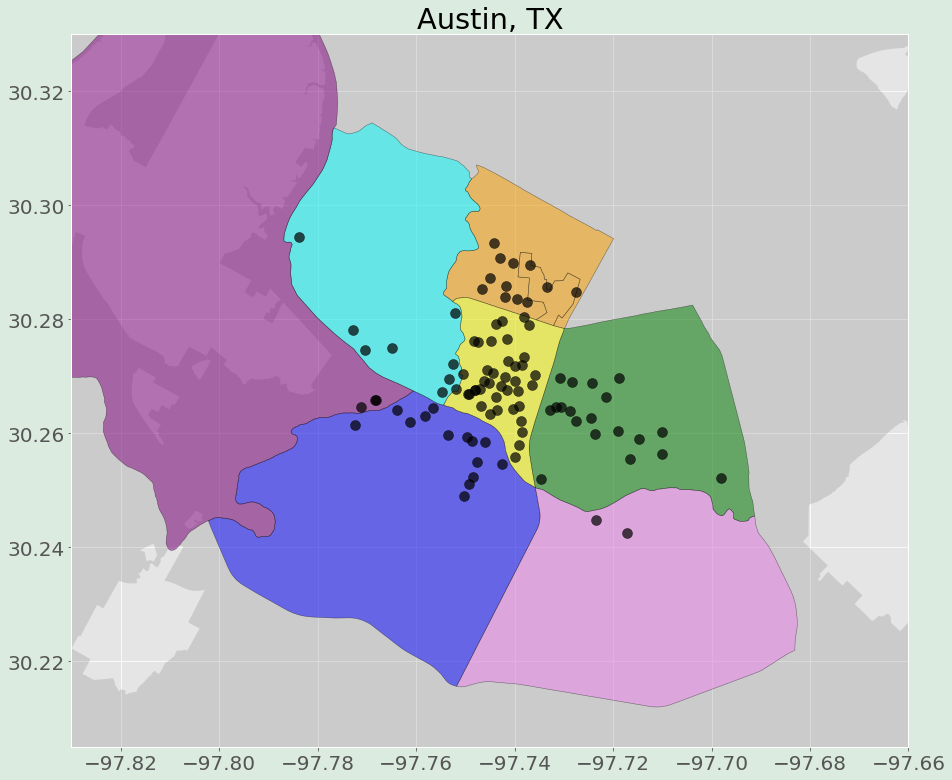

In [31]:
#from matplotlib_scalebar.scalebar import ScaleBar

markersize = 100

fig,ax = plt.subplots(figsize = (15,15))

base_map_service_area.to_crs(epsg=4326).plot(ax = ax, alpha = 0.25, color="grey")
#base_map_transit_hubs.to_crs(epsg=4326).plot(ax = ax, markersize = 200, color="green")
#base_map_routes.to_crs(epsg=4326).plot(ax = ax, alpha=0.05, color="blue")
#base_map_zips.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

base_map_zips[base_map_zips['zipcode']=='78705'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78712'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78704'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="blue",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78703'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="cyan",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78702'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="green",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78701'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78746'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78741'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="violet",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black", markersize=markersize, alpha=0.70)
ax.set_xlim(-97.83,-97.66)
ax.set_ylim(30.205,30.33)

fig.patch.set_facecolor('#dbebdf')

ax.set_title('Austin, TX')
#ax.add_artist(ScaleBar(1))


Text(0.5, 1.0, 'Austin, TX')

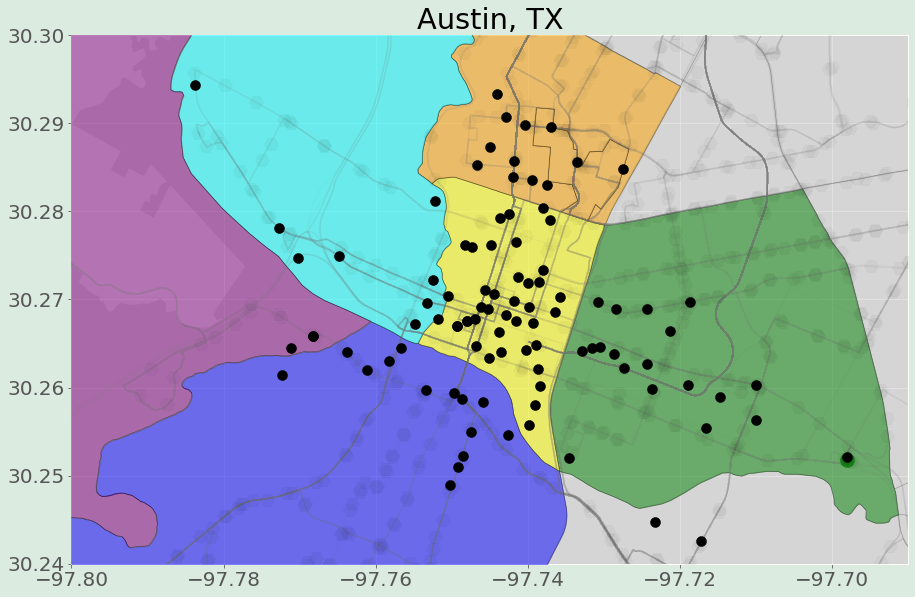

In [32]:
markersize = 100

fig,ax = plt.subplots(figsize = (15,15))

base_map_service_area.to_crs(epsg=4326).plot(
    ax = ax, alpha = 0.25, color="grey", zorder=1)
base_map_zips.to_crs(epsg=4326).plot(
    ax = ax, alpha=0.2, color="white",edgecolor='black', zorder=2)

base_map_zips[base_map_zips['zipcode']=='78705'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black', zorder=3)
base_map_zips[base_map_zips['zipcode']=='78712'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black', zorder=3)
base_map_zips[base_map_zips['zipcode']=='78704'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="blue",edgecolor='black', zorder=3)
base_map_zips[base_map_zips['zipcode']=='78703'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="cyan",edgecolor='black', zorder=3)
base_map_zips[base_map_zips['zipcode']=='78702'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="green",edgecolor='black', zorder=3)
base_map_zips[base_map_zips['zipcode']=='78701'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black', zorder=3)
base_map_zips[base_map_zips['zipcode']=='78746'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black', zorder=3)
base_map_zips[base_map_zips['zipcode']=='78741'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.0, color="violet",edgecolor='black', zorder=3)

base_map_routes.to_crs(epsg=4326).plot(
    ax = ax, color="grey",alpha=0.03, zorder=4)
base_map_transit_hubs.to_crs(epsg=4326).plot(
    ax = ax, markersize = 200, color="green",alpha=0.75, zorder=5)
base_map_transit_stops.to_crs(epsg=4326).plot(
    ax = ax, markersize = 200, color="black",alpha=0.03, zorder=5, marker="H")
        
kiosk_geo.plot(
    ax = ax, color="black", markersize=markersize, zorder=6, marker="o")
ax.set_xlim(-97.80,-97.69)
ax.set_ylim(30.24,30.30)

fig.patch.set_facecolor('#dbebdf')

ax.set_title('Austin, TX')

#plt.arrow(-97.78, 30.25, 0, 0.02, length_includes_head=True,
#          head_width=0.002, head_length=0.002, 
#          facecolor='k',zorder=7)

In [33]:
kiosk_geo.head()

,Unnamed: 0,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,...,Num_Rides_2018_Wkends,Num_Rides_2019_Wkends,Num_Rides_2020_Wkends,Num_Rides_2021_Wkends,Num_Rides_2017,Num_Rides_2018,Num_Rides_2019,Num_Rides_2020,Num_Rides_2021,geometry
0,0,2570,South Congress & Academy,active,"(30.25226, -97.74854)",1199 S. Congress Ave.,NaN,16752.0,sidewalk,10.0,...,31400.0,7325.0,9850.0,10525.0,83900.0,54925.0,13650.0,15975.0,16650.0,POINT (-97.74854 30.25226)
1,1,2571,Red River & 8th Street,active,"(30.26854, -97.73646)",761 Red River St.,NaN,16760.0,sidewalk,13.0,...,29125.0,8825.0,9525.0,11600.0,68250.0,54125.0,17775.0,16200.0,21475.0,POINT (-97.73646 30.26854)
2,2,2572,Barton Springs Pool,active,"(30.26452, -97.7712)",2200 William Barton Dr.,NaN,16758.0,parkland,13.0,...,45350.0,22325.0,16950.0,15800.0,95600.0,76675.0,40025.0,31575.0,29725.0,POINT (-97.77120 30.26452)
3,3,2574,Zilker Park,active,"(30.2659, -97.76822)",Barton Springs Rd,Zilker Park at Barton Springs and William Burt...,16759.0,parkland,17.0,...,78250.0,43000.0,46175.0,41850.0,154175.0,125125.0,69800.0,76575.0,69375.0,POINT (-97.76822 30.26590)
4,4,2575,Riverside @ S. Lamar,active,"(30.26446, -97.75665)",Presented by Austin Parks Foundation,NaN,16736.0,parkland,15.0,...,104700.0,55400.0,57325.0,41625.0,210800.0,171925.0,97500.0,100650.0,73825.0,POINT (-97.75665 30.26446)


Text(-97.7, 30.289, '78741')

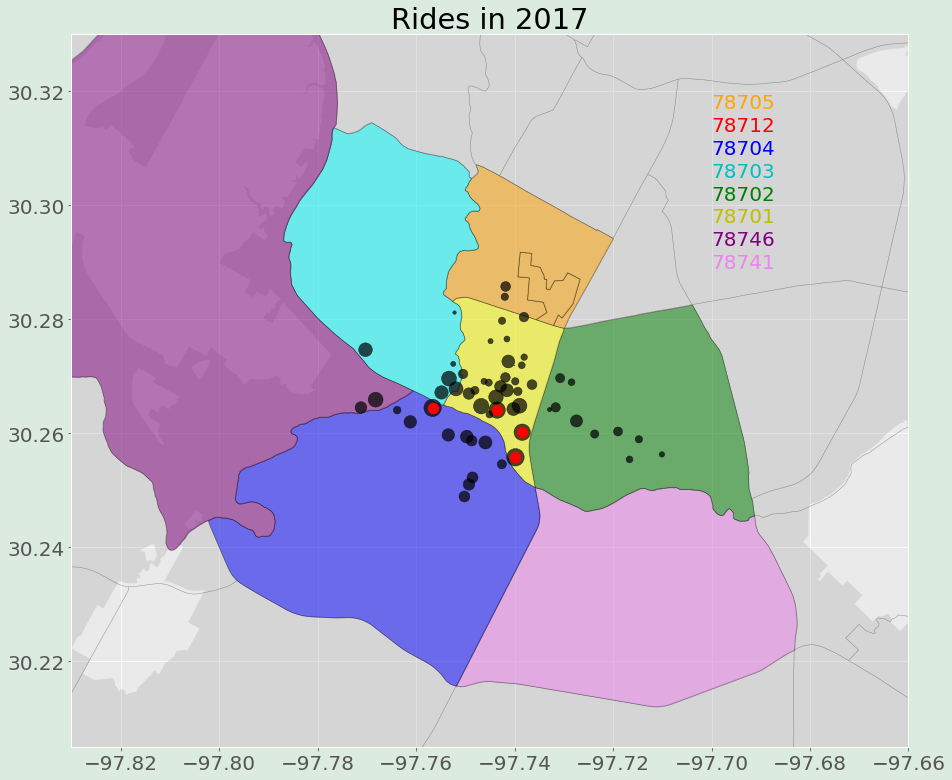

In [34]:
markersize = kiosk_geo['Num_Rides_2017']/700

fig,ax = plt.subplots(figsize = (15,15))
base_map_service_area.to_crs(epsg=4326).plot(ax = ax, alpha = 0.25, color="grey")
#base_map_transit_hubs.to_crs(epsg=4326).plot(ax = ax, markersize = 200, color="green")
#base_map_routes.to_crs(epsg=4326).plot(ax = ax, alpha=0.05, color="blue")

base_map_zips.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

base_map_zips[base_map_zips['zipcode']=='78705'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78712'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78704'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="blue",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78703'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="cyan",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78702'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="green",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78701'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78746'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78741'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="violet",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2707].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2575].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2494].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2563].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)

ax.set_xlim(-97.83,-97.66)
ax.set_ylim(30.205,30.33)
ax.set_title('Rides in 2017')

fig.patch.set_facecolor('#dbebdf')

plt.text(-97.70,30.317,"78705",color='orange')
plt.text(-97.70,30.313,"78712",color='r')
plt.text(-97.70,30.309,"78704",color='b')
plt.text(-97.70,30.305,"78703",color='c')
plt.text(-97.70,30.301,"78702",color='g')
plt.text(-97.70,30.297,"78701",color='y')
plt.text(-97.70,30.293,"78746",color='purple')
plt.text(-97.70,30.289,"78741",color='violet')

Text(-97.7, 30.289, '78741')

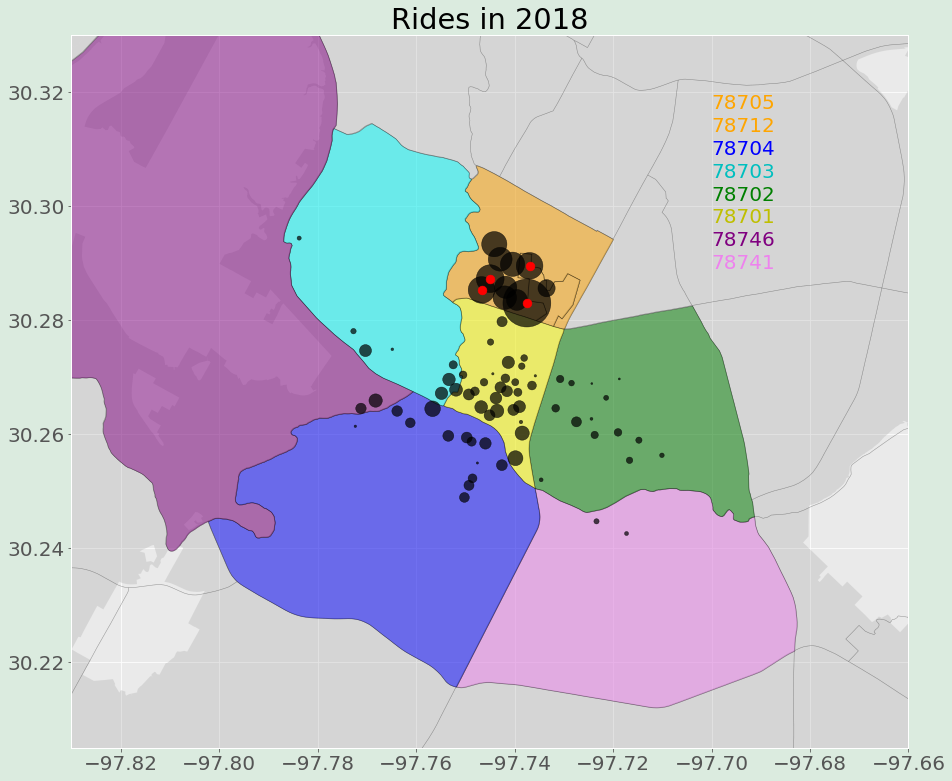

In [35]:
markersize = kiosk_geo['Num_Rides_2018']/700

fig,ax = plt.subplots(figsize = (15,15))
base_map_service_area.to_crs(epsg=4326).plot(ax = ax, alpha = 0.25, color="grey")
#base_map_transit_hubs.to_crs(epsg=4326).plot(ax = ax, markersize = 200, color="green")
#base_map_routes.to_crs(epsg=4326).plot(ax = ax, alpha=0.05, color="blue")

base_map_zips.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

base_map_zips[base_map_zips['zipcode']=='78705'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78712'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78704'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="blue",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78703'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="cyan",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78702'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="green",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78701'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78746'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78741'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="violet",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3798].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3841].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3792].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3794].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)

ax.set_xlim(-97.83,-97.66)
ax.set_ylim(30.205,30.33)
ax.set_title('Rides in 2018')

fig.patch.set_facecolor('#dbebdf')

plt.text(-97.70,30.317,"78705",color='orange')
plt.text(-97.70,30.313,"78712",color='orange')
plt.text(-97.70,30.309,"78704",color='b')
plt.text(-97.70,30.305,"78703",color='c')
plt.text(-97.70,30.301,"78702",color='g')
plt.text(-97.70,30.297,"78701",color='y')
plt.text(-97.70,30.293,"78746",color='purple')
plt.text(-97.70,30.289,"78741",color='violet')

Text(-97.7, 30.289, '78741')

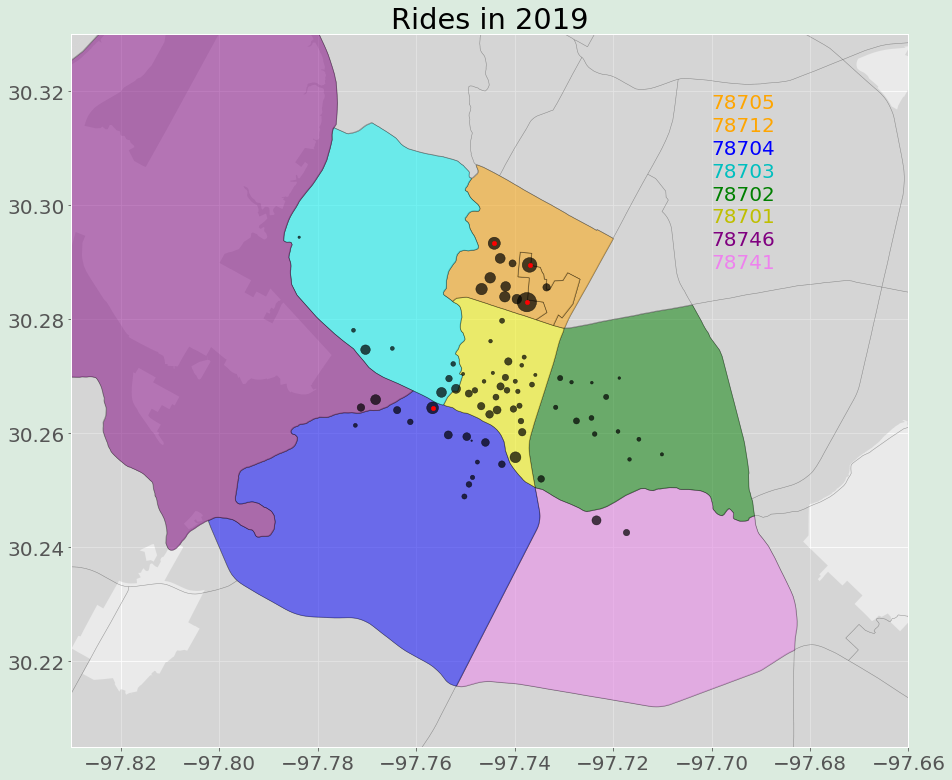

In [36]:
markersize = kiosk_geo['Num_Rides_2019']/700

fig,ax = plt.subplots(figsize = (15,15))
base_map_service_area.to_crs(epsg=4326).plot(ax = ax, alpha = 0.25, color="grey")
#base_map_transit_hubs.to_crs(epsg=4326).plot(ax = ax, markersize = 200, color="green")
#base_map_routes.to_crs(epsg=4326).plot(ax = ax, alpha=0.05, color="blue")

base_map_zips.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

base_map_zips[base_map_zips['zipcode']=='78705'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78712'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78704'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="blue",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78703'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="cyan",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78702'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="green",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78701'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78746'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78741'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="violet",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)

kiosk_geo[kiosk_geo['Kiosk ID'] == 3798].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3794].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3793].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2575].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)

ax.set_xlim(-97.83,-97.66)
ax.set_ylim(30.205,30.33)
ax.set_title('Rides in 2019')

fig.patch.set_facecolor('#dbebdf')

plt.text(-97.70,30.317,"78705",color='orange')
plt.text(-97.70,30.313,"78712",color='orange')
plt.text(-97.70,30.309,"78704",color='b')
plt.text(-97.70,30.305,"78703",color='c')
plt.text(-97.70,30.301,"78702",color='g')
plt.text(-97.70,30.297,"78701",color='y')
plt.text(-97.70,30.293,"78746",color='purple')
plt.text(-97.70,30.289,"78741",color='violet')

Text(-97.7, 30.289, '78741')

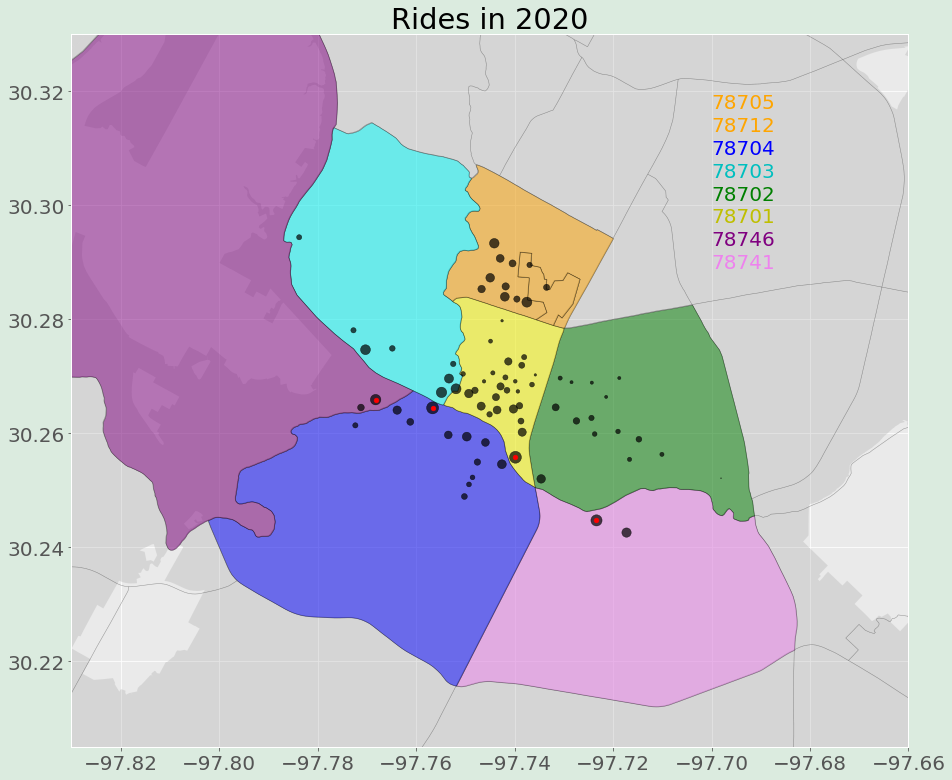

In [37]:
markersize = kiosk_geo['Num_Rides_2020']/700

fig,ax = plt.subplots(figsize = (15,15))
base_map_service_area.to_crs(epsg=4326).plot(ax = ax, alpha = 0.25, color="grey")
#base_map_transit_hubs.to_crs(epsg=4326).plot(ax = ax, markersize = 200, color="green")
#base_map_routes.to_crs(epsg=4326).plot(ax = ax, alpha=0.05, color="blue")

base_map_zips.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

base_map_zips[base_map_zips['zipcode']=='78705'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78712'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78704'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="blue",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78703'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="cyan",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78702'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="green",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78701'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78746'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="purple",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78741'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="violet",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)

kiosk_geo[kiosk_geo['Kiosk ID'] == 2575].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2707].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 4061].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2574].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)

ax.set_xlim(-97.83,-97.66)
ax.set_ylim(30.205,30.33)
ax.set_title('Rides in 2020')

fig.patch.set_facecolor('#dbebdf')

plt.text(-97.70,30.317,"78705",color='orange')
plt.text(-97.70,30.313,"78712",color='orange')
plt.text(-97.70,30.309,"78704",color='b')
plt.text(-97.70,30.305,"78703",color='c')
plt.text(-97.70,30.301,"78702",color='g')
plt.text(-97.70,30.297,"78701",color='y')
plt.text(-97.70,30.293,"78746",color='purple')
plt.text(-97.70,30.289,"78741",color='violet')

Text(-97.7, 30.289, '78741')

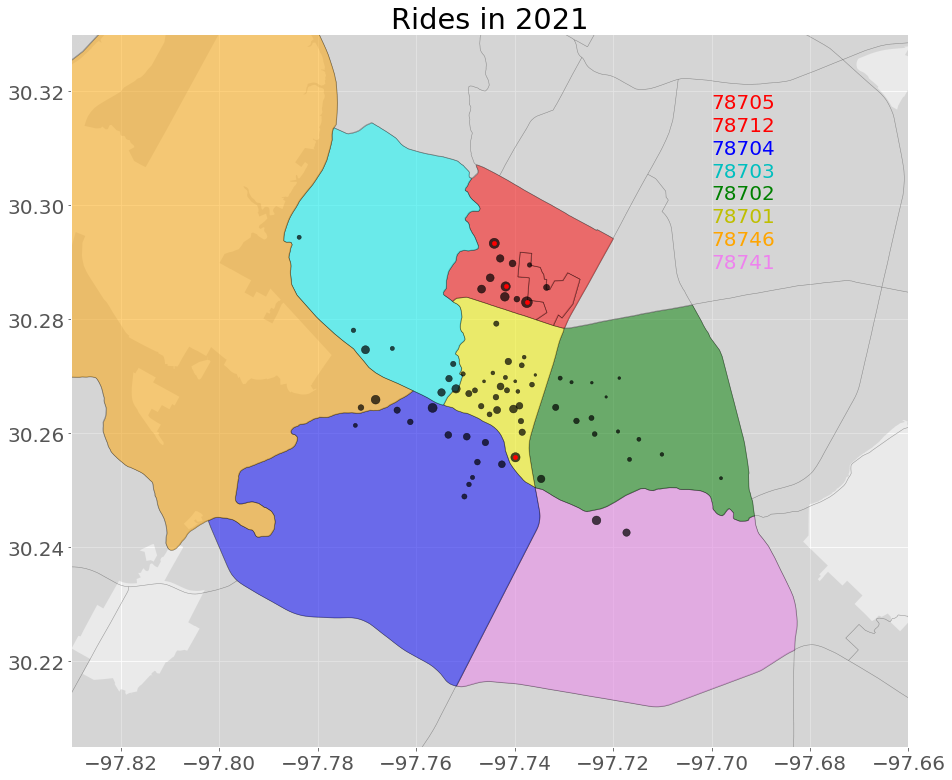

In [38]:
markersize = kiosk_geo['Num_Rides_2021']/900

fig,ax = plt.subplots(figsize = (15,15))
base_map_service_area.to_crs(epsg=4326).plot(ax = ax, alpha = 0.25, color="grey")
#base_map_transit_hubs.to_crs(epsg=4326).plot(ax = ax, markersize = 200, color="green")
#base_map_routes.to_crs(epsg=4326).plot(ax = ax, alpha=0.05, color="blue")

base_map_zips.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="white",edgecolor='black')

base_map_zips[base_map_zips['zipcode']=='78705'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="red",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78712'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="red",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78704'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="blue",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78703'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="cyan",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78702'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="green",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78701'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="yellow",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78746'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="orange",edgecolor='black')
base_map_zips[base_map_zips['zipcode']=='78741'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="violet",edgecolor='black')

kiosk_geo.plot(ax = ax, color="black",markersize=markersize, alpha=0.70)

kiosk_geo[kiosk_geo['Kiosk ID'] == 3798].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3793].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2548].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2707].plot(
    ax = ax, color="red",markersize=markersize, alpha=1)

ax.set_xlim(-97.83,-97.66)
ax.set_ylim(30.205,30.33)
ax.set_title('Rides in 2021')

plt.text(-97.70,30.317,"78705",color='r')
plt.text(-97.70,30.313,"78712",color='r')
plt.text(-97.70,30.309,"78704",color='b')
plt.text(-97.70,30.305,"78703",color='c')
plt.text(-97.70,30.301,"78702",color='g')
plt.text(-97.70,30.297,"78701",color='y')
plt.text(-97.70,30.293,"78746",color='orange')
plt.text(-97.70,30.289,"78741",color='violet')